# Lab_Dimensionality Reduction
## Shang mingxia P-COM0077/19

### 1.Load dataset

In [1]:
import pandas as pd
import numpy as np

In [37]:
from sklearn.datasets import load_diabetes 
diabete = load_diabetes()

### 2.data explore

In [38]:
db_pd = pd.DataFrame(diabete.data)
db_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [39]:
print(diabete.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [40]:
db_pd.columns=diabete.feature_names

In [41]:
x=db_pd

In [42]:
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [43]:
y = diabete.target

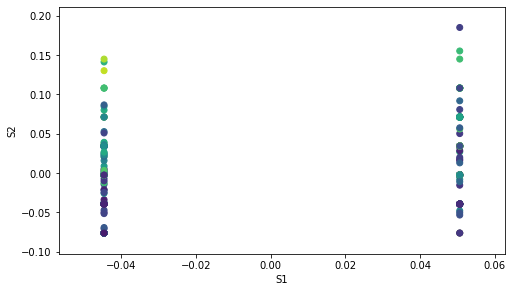

In [44]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.scatter(x.sex,x.s4, c=y)
plt.xlabel('S1')
plt.ylabel('S2')
plt.show()

### 3.Feature Reduction using PCA

In [45]:
 from sklearn.decomposition import PCA
pca = PCA(n_components=1)
cols = ['sex', 's4']
X_pca = pca.fit_transform(x[cols])
X_pca_pd = pd.DataFrame(data=X_pca, columns=['PCA'])

Text(0.5, 0, 'PCA')

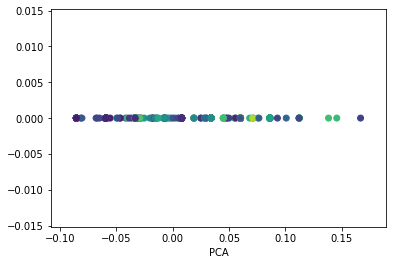

In [46]:
y_pca = np.zeros(len(X_pca))
plt.scatter(X_pca_pd, y_pca, c=y)
plt.xlabel('PCA')

Text(0.5, 0, 'PCA')

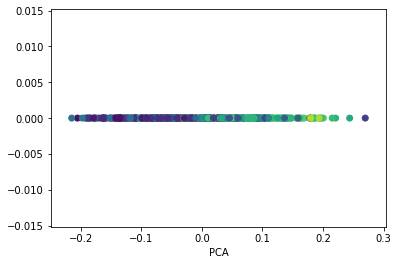

In [47]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(x)
X_pca_pd = pd.DataFrame(data=X_pca, columns=['PCA'])
y_pca = np.zeros(len(X_pca))
plt.scatter(X_pca_pd, y_pca, c=y)
plt.xlabel('PCA')

Text(0, 0.5, 'PCA2')

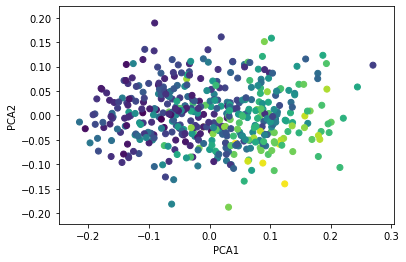

In [48]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
X_pca_pd = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
plt.scatter(X_pca_pd.PCA1, X_pca_pd.PCA2, c=y)
plt.xlabel('PCA1')
plt.ylabel('PCA2')

### 4.Feature Reduction using LDA

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
lda = LinearDiscriminantAnalysis(n_components=1)
y_ = np.zeros(len(x))
cols = ['sex', 's4']
X_lda = lda.fit(x[cols], y).transform(x[cols])
X_lda_pd = pd.DataFrame(data=X_lda, columns=['LDA'])

Text(0.5, 0, 'LDA')

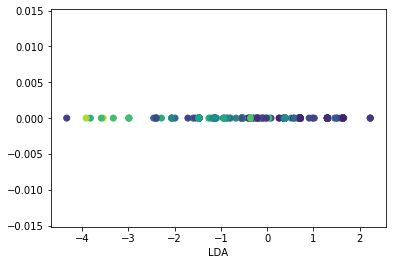

In [50]:
y_lda = np.zeros(len(X_lda)) # dummy data (y axis) for plotting the transformed␣ 􏰀→data.
plt.scatter(X_lda_pd, y_lda, c=y)
plt.xlabel('LDA')

### 5.Feature Reduction using Univariate Feature Selection

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
kBest = SelectKBest(chi2, k=2)
kBest.fit(x, y)

SelectKBest(k=2, score_func=<function chi2 at 0x1a23b14400>)

In [52]:
sup = kBest.get_support(True) 
print(sup)

[1 7]


### 6.Feature Reduction using Sequential Feature Selection

In [57]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#pred_model = DecisionTreeClassifier(criterion='entropy', max_depth=5) 
pred_model = GaussianNB()
sfs = SFS(pred_model, k_features=5, forward=True, scoring='accuracy', cv=0) 
sfs = sfs.fit(x, y)

In [58]:
 sfs.subsets_

{1: {'feature_idx': (5,),
  'cv_scores': array([0.2239819]),
  'avg_score': 0.2239819004524887,
  'feature_names': ('5',)},
 2: {'feature_idx': (5, 6),
  'cv_scores': array([0.32126697]),
  'avg_score': 0.3212669683257919,
  'feature_names': ('5', '6')},
 3: {'feature_idx': (5, 6, 8),
  'cv_scores': array([0.40723982]),
  'avg_score': 0.4072398190045249,
  'feature_names': ('5', '6', '8')},
 4: {'feature_idx': (2, 5, 6, 8),
  'cv_scores': array([0.48190045]),
  'avg_score': 0.4819004524886878,
  'feature_names': ('2', '5', '6', '8')},
 5: {'feature_idx': (2, 5, 6, 8, 9),
  'cv_scores': array([0.5361991]),
  'avg_score': 0.5361990950226244,
  'feature_names': ('2', '5', '6', '8', '9')}}

In [59]:
sfs.k_feature_idx_

(2, 5, 6, 8, 9)

In [60]:
 sfs.k_score_

0.5361990950226244